## Load data files

In [98]:
import codecs
import re
from keras.utils.np_utils import to_categorical
import numpy as np

def load_data(filename):
    data = list(codecs.open(filename, 'r', 'utf-8').readlines())
    x, y = zip(*[d.strip().split('\t') for d in data])
    # Reducing any char-acter sequence of more than 3 consecutive repetitions to a respective 3-character sequence 
    # (e.g. “!!!!!!!!”turns to “!!!”)
    # x = [re.sub(r'((.)\2{3,})', r'\2\2\2', i) for i in x]
    x = np.asarray(list(x))
    y = to_categorical(y, 3)
    
    return x, y
    
x_token_train, y_token_train = load_data('data/token_train.tsv')
x_token_test, y_token_test = load_data('data/token_test.tsv')
x_morph_train, y_morph_train = load_data('data/morph_train.tsv')
x_morph_test, y_morph_test = load_data('data/morph_test.tsv')

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

X token train shape: (10244,)
X token test shape: (2560,)
X morph train shape: (10244,)
X morph test shape: (2560,)


In [83]:
print(x_token_train[:5])

['ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער' 'איש יקר שלנו'
 'כל הכבוד והמון בהצלחה'
 '" תל חי , רובי . בכל העצב הזה היית קרן אור של תקוה . אכן יש נשיא בישראל "'
 'נקי כפיים ובר לבב בהצלחה לך ולנו .']


In [84]:
print(x_token_test[:5])

['" שמע ישראל , השם ישמור ויקרא הגורל = ( י.ק.ו.ק . ) אימרו אמן לאבא השם שלנו ! ! ! ! אחרי ברכה של ביבי ! הכח בישראל הוא מתי שיש משמעת ופרגמתיות במשרדי החינוך שזה איתן את האור ! שמאוד חסר לנו ! , והתאחדות באחד שלם , ואין שמאל ואין ימין ! ובישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של התיקון הכללי ו תדליקו את הנר ! "'
 'איחולי הצלחה בתפקידך .' 'כל הכבוד !!!'
 '" בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי העם שנבחר אדם עשיר בענווה , יושרה ודעת ״ מי ייתן ותאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . "'
 'איפה הגינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105']


In [85]:
print(x_morph_train[:5])

['ממש כואב ..... אני בכה את היא עם ה משפחה ש לא תדעו עוד צער'
 'איש יקר של אנחנו' 'כל ה כבוד ו המון ב הצלחה'
 '" תל חי , רובי . ב כל ה עצב ה זה היית קרן אור של תקוה . אכן יש נשיא ב ישראל "'
 'נקי כפיים ו בר לבב ב הצלחה ל אתה ו ל אנחנו .']


In [86]:
print(x_morph_test[:5])

['" שמע ישראל , ה שם ישמור ו יקרא ה גורל =  ( י.ק.ו.ק . ) אימרו אמן ל אבא ה שם של אנחנו ! ! ! ! אחרי ברכה של ביבי ! ה כח ב ה ישראל הוא מתי ש יש משמעת ו פרגמתיות ב משרדי ה חינוך ש זה איתן את ה אור ! ש מאוד חסר ל אנחנו ! , ו התאחדות ב אחד שלם , ו אין שמאל ו אין ימין ! ו ב ישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של ה תיקון ה כללי ו תדליקו את ה נר ! "'
 'איחולי הצלחה ב תפקידך .' 'כל ה כבוד !!!'
 '" בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי ה עם ש נבחר אדם עשיר ב ענווה , יושרה ו דעת ״  מי ייתן ו תאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . "'
 'איפה ה גינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105']


## Prepare
Convert text (train & test) to sequences and pad to requested document length

In [99]:
from keras.preprocessing import text, sequence

def tokenizer(x_train, x_test, vocabulary_size, char_level):
    tokenize = text.Tokenizer(num_words=vocabulary_size, 
                              char_level=char_level,
                              filters='')
    tokenize.fit_on_texts(x_train)  # only fit on train
    #print('UNK index: {}'.format(tokenize.word_index['UNK']))
    
    x_train = tokenize.texts_to_sequences(x_train)
    x_test = tokenize.texts_to_sequences(x_test)
    
    return x_train, x_test

def pad(x_train, x_test, max_document_length):
    x_train = sequence.pad_sequences(x_train, maxlen=max_document_length, padding='post', truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=max_document_length, padding='post', truncating='post')
    
    return x_train, x_test

vocabulary_size = 5000

x_token_train, x_token_test = tokenizer(x_token_train, x_token_test, vocabulary_size, False)
x_morph_train, x_morph_test = tokenizer(x_morph_train, x_morph_test, vocabulary_size, False)

max_document_length = 100

x_token_train, x_token_test = pad(x_token_train, x_token_test, max_document_length)
x_morph_train, x_morph_test = pad(x_morph_train, x_morph_test, max_document_length)

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

X token train shape: (10244, 100)
X token test shape: (2560, 100)
X morph train shape: (10244, 100)
X morph test shape: (2560, 100)


In [88]:
print('Token OOV ratio: {} ({} out of 28787)'.format(np.count_nonzero(x_token_test == 28787)/28787, np.count_nonzero(x_token_test == 28787)))
print('Morph OOV ratio: {} ({} out of 18912)'.format(np.count_nonzero(x_morph_test == 18912)/18912, np.count_nonzero(x_morph_test == 18912)))

Token OOV ratio: 0.08865112724493696 (2552 out of 28787)
Morph OOV ratio: 0.07624788494077835 (1442 out of 18912)


## Plot function

In [100]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    
    fig, axs = plt.subplots(1, 2, sharex=True)
    
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    
    axs[1].plot(history.history['acc'])
    axs[1].plot(history.history['val_acc'])
    axs[1].set_title('Model Accuracy')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    
    fig.tight_layout()
    plt.show()

## Import required modules from Keras

In [101]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPool1D
from keras.layers import BatchNormalization
from keras import optimizers
from keras import metrics
from keras import backend as K

## Default Parameters

In [102]:
dropout_keep_prob = 0.5
embedding_size = 300
batch_size = 50
lr = 1e-4
dev_size = 0.2

## Linear - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/10
8195/8195 [==============================] - 1s 102us/step - loss: 9.4109 - acc: 0.3852 - val_loss: 8.0918 - val_acc: 0.4700
Epoch 2/10
8195/8195 [==============================] - 0s 56us/step - loss: 7.4096 - acc: 0.5154 - val_loss: 6.4014 - val_acc: 0.5930
Epoch 3/10
8195/8195 [==============================] - 0s 61us/step - loss: 6.3387 - acc: 0.5957 - val_loss: 6.0046 - val_acc: 0.6203
Epoch 4/10
8195/8195 [==============================] - 0s 58us/step - loss: 5.9950 - acc: 0.6190 - val_loss: 5.9001 - val_acc: 0.6276
Epoch 5/10
8195/8195 [==============================] - 0s 54us/step - loss: 5.6493 - acc: 0.6411 - val_loss: 5.5351 - val_acc: 0.6506
Epoch 6/10
8195/8195 [==============================] - 1s 77us/step - loss: 5.4348 - acc: 0.6515 - val_loss: 5.5007 - val_acc: 0.6530
Epoch 7/10
8195/8195 [==============================] - 0s 54us/step - loss: 5.3617 - acc: 0.6582 - val_loss: 5.3959 - val_acc: 0.6613
Epoch 

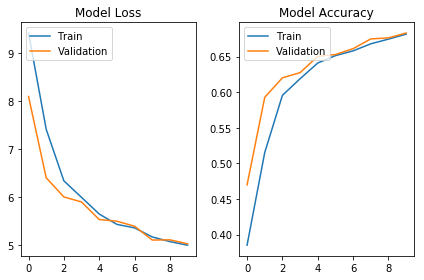

2560/2560 [==============================] - 0s 27us/step

Accurancy: 0.6820


In [103]:
num_epochs = 10

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/Linear-Token-{:.3f}.h5'.format((scores[1] * 100)))

## Linear - Morph

Train on 8195 samples, validate on 2049 samples
Epoch 1/10
8195/8195 [==============================] - 1s 97us/step - loss: 9.8982 - acc: 0.3519 - val_loss: 8.2902 - val_acc: 0.4573
Epoch 2/10
8195/8195 [==============================] - 0s 52us/step - loss: 7.7296 - acc: 0.5024 - val_loss: 7.0930 - val_acc: 0.5451
Epoch 3/10
8195/8195 [==============================] - 0s 60us/step - loss: 6.5224 - acc: 0.5832 - val_loss: 6.4932 - val_acc: 0.5900
Epoch 4/10
8195/8195 [==============================] - 0s 60us/step - loss: 6.1808 - acc: 0.6079 - val_loss: 6.1911 - val_acc: 0.6091
Epoch 5/10
8195/8195 [==============================] - 0s 61us/step - loss: 5.8964 - acc: 0.6281 - val_loss: 6.0357 - val_acc: 0.6223
Epoch 6/10
8195/8195 [==============================] - 0s 58us/step - loss: 5.7071 - acc: 0.6399 - val_loss: 5.9109 - val_acc: 0.6276
Epoch 7/10
8195/8195 [==============================] - 0s 59us/step - loss: 5.6071 - acc: 0.6470 - val_loss: 5.8021 - val_acc: 0.6374
Epoch 8

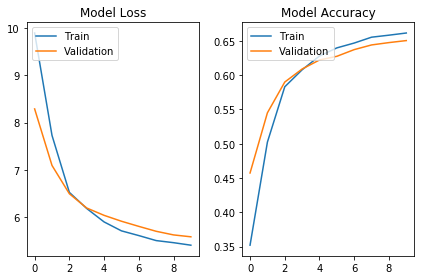

2560/2560 [==============================] - 0s 20us/step

Accurancy: 0.6613


In [104]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/Linear-Morph-{:.3f}.h5'.format((scores[1] * 100)))

## CNN - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/5
8195/8195 [==============================] - 111s 14ms/step - loss: 0.6998 - acc: 0.6997 - val_loss: 0.6503 - val_acc: 0.7291
Epoch 2/5
8195/8195 [==============================] - 108s 13ms/step - loss: 0.5681 - acc: 0.7799 - val_loss: 0.4971 - val_acc: 0.8072
Epoch 3/5
8195/8195 [==============================] - 103s 13ms/step - loss: 0.4006 - acc: 0.8614 - val_loss: 0.4010 - val_acc: 0.8619
Epoch 4/5
8195/8195 [==============================] - 103s 13ms/step - loss: 0.2916 - acc: 0.9042 - val_loss: 0.3629 - val_acc: 0.8751
Epoch 5/5
8195/8195 [==============================] - 108s 13ms/step - loss: 0.2275 - acc: 0.9302 - val_loss: 0.3543 - val_acc: 0.8834


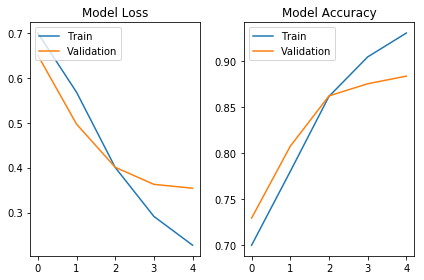

2560/2560 [==============================] - 9s 4ms/step

Accurancy: 0.892


In [105]:
num_epochs = 5

# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                        batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/CNN-Token-{:.3f}.h5'.format((scores[1] * 100)))


## CNN - Morph

Train on 8195 samples, validate on 2049 samples
Epoch 1/5
8195/8195 [==============================] - 121s 15ms/step - loss: 0.7027 - acc: 0.7024 - val_loss: 0.6580 - val_acc: 0.7174
Epoch 2/5
8195/8195 [==============================] - 111s 14ms/step - loss: 0.5823 - acc: 0.7684 - val_loss: 0.4978 - val_acc: 0.8233
Epoch 3/5
8195/8195 [==============================] - 109s 13ms/step - loss: 0.4035 - acc: 0.8576 - val_loss: 0.3968 - val_acc: 0.8536
Epoch 4/5
8195/8195 [==============================] - 111s 14ms/step - loss: 0.2978 - acc: 0.9019 - val_loss: 0.3528 - val_acc: 0.8829
Epoch 5/5
8195/8195 [==============================] - 114s 14ms/step - loss: 0.2364 - acc: 0.9259 - val_loss: 0.3397 - val_acc: 0.8853


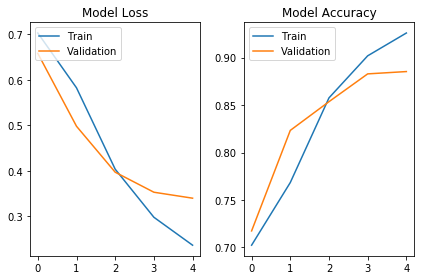

2560/2560 [==============================] - 8s 3ms/step

Accurancy: 0.8906


In [106]:
# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/CNN-Morph-{:.3f}.h5'.format((scores[1] * 100)))

## LSTM - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/7
8195/8195 [==============================] - 153s 19ms/step - loss: 0.8279 - acc: 0.6556 - val_loss: 0.7428 - val_acc: 0.6593
Epoch 2/7
8195/8195 [==============================] - 156s 19ms/step - loss: 0.7493 - acc: 0.6649 - val_loss: 0.7407 - val_acc: 0.6623
Epoch 3/7
8195/8195 [==============================] - 151s 18ms/step - loss: 0.7424 - acc: 0.6709 - val_loss: 0.7399 - val_acc: 0.6686
Epoch 4/7
8195/8195 [==============================] - 155s 19ms/step - loss: 0.7361 - acc: 0.6746 - val_loss: 0.7372 - val_acc: 0.6803
Epoch 5/7
8195/8195 [==============================] - 147s 18ms/step - loss: 0.7372 - acc: 0.6776 - val_loss: 0.7327 - val_acc: 0.6823
Epoch 6/7
8195/8195 [==============================] - 148s 18ms/step - loss: 0.6492 - acc: 0.7402 - val_loss: 0.6796 - val_acc: 0.6906
Epoch 7/7
8195/8195 [==============================] - 148s 18ms/step - loss: 0.4769 - acc: 0.8409 - val_loss: 0.4786 - val_acc: 0.8399


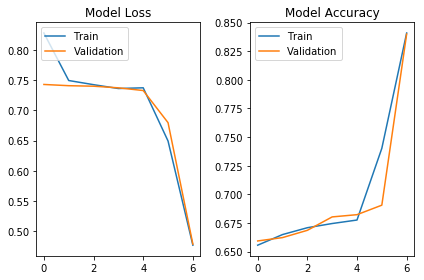

2560/2560 [==============================] - 12s 5ms/step

Accurancy: 0.852


In [114]:
num_epochs = 7
lstm_units = 93

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/LSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))


## LSTM - Morph

Train on 8195 samples, validate on 2049 samples
Epoch 1/7
8195/8195 [==============================] - 99s 12ms/step - loss: 0.8054 - acc: 0.6630 - val_loss: 0.7406 - val_acc: 0.6593
Epoch 2/7
8195/8195 [==============================] - 100s 12ms/step - loss: 0.7322 - acc: 0.6671 - val_loss: 0.7363 - val_acc: 0.6593
Epoch 3/7
8195/8195 [==============================] - 99s 12ms/step - loss: 0.7283 - acc: 0.6748 - val_loss: 0.7326 - val_acc: 0.6911
Epoch 4/7
8195/8195 [==============================] - 96s 12ms/step - loss: 0.7148 - acc: 0.6941 - val_loss: 0.7277 - val_acc: 0.6984
Epoch 5/7
8195/8195 [==============================] - 96s 12ms/step - loss: 0.5452 - acc: 0.7980 - val_loss: 0.4492 - val_acc: 0.8277
Epoch 6/7
8195/8195 [==============================] - 99s 12ms/step - loss: 0.3767 - acc: 0.8709 - val_loss: 0.4376 - val_acc: 0.8375
Epoch 7/7
8195/8195 [==============================] - 96s 12ms/step - loss: 0.3036 - acc: 0.9054 - val_loss: 0.4061 - val_acc: 0.8619


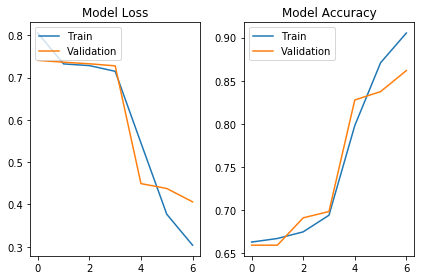

2560/2560 [==============================] - 8s 3ms/step

Accurancy: 0.862


In [108]:
num_epochs = 7

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/LSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

## BiLSTM - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/3
8195/8195 [==============================] - 219s 27ms/step - loss: 0.7574 - acc: 0.6876 - val_loss: 0.6579 - val_acc: 0.7272
Epoch 2/3
8195/8195 [==============================] - 212s 26ms/step - loss: 0.5360 - acc: 0.7993 - val_loss: 0.4653 - val_acc: 0.8253
Epoch 3/3
8195/8195 [==============================] - 212s 26ms/step - loss: 0.3556 - acc: 0.8819 - val_loss: 0.4067 - val_acc: 0.8536


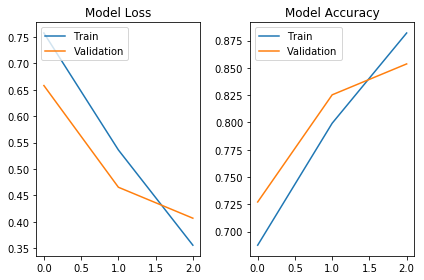

2560/2560 [==============================] - 16s 6ms/step

Accurancy: 0.874


In [109]:
num_epochs = 3

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/BiLSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))

## BiLSTM - Morph

Train on 8195 samples, validate on 2049 samples
Epoch 1/3
8195/8195 [==============================] - 217s 26ms/step - loss: 0.7777 - acc: 0.6633 - val_loss: 0.6716 - val_acc: 0.7052
Epoch 2/3
8195/8195 [==============================] - 210s 26ms/step - loss: 0.5638 - acc: 0.7790 - val_loss: 0.4487 - val_acc: 0.8350
Epoch 3/3
8195/8195 [==============================] - 211s 26ms/step - loss: 0.3663 - acc: 0.8722 - val_loss: 0.3792 - val_acc: 0.8638


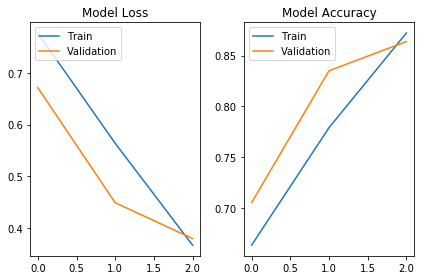

2560/2560 [==============================] - 16s 6ms/step

Accurancy: 0.875


In [110]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/BiLSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

## MLP - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/6
8195/8195 [==============================] - 56s 7ms/step - loss: 0.8829 - acc: 0.5907 - val_loss: 0.7232 - val_acc: 0.6950
Epoch 2/6
8195/8195 [==============================] - 55s 7ms/step - loss: 0.7718 - acc: 0.6595 - val_loss: 0.6982 - val_acc: 0.7135
Epoch 3/6
8195/8195 [==============================] - 56s 7ms/step - loss: 0.7250 - acc: 0.6948 - val_loss: 0.6528 - val_acc: 0.7243
Epoch 4/6
8195/8195 [==============================] - 55s 7ms/step - loss: 0.6569 - acc: 0.7300 - val_loss: 0.5763 - val_acc: 0.7672
Epoch 5/6
8195/8195 [==============================] - 56s 7ms/step - loss: 0.5388 - acc: 0.7971 - val_loss: 0.4485 - val_acc: 0.8321
Epoch 6/6
8195/8195 [==============================] - 56s 7ms/step - loss: 0.4014 - acc: 0.8664 - val_loss: 0.3789 - val_acc: 0.8638


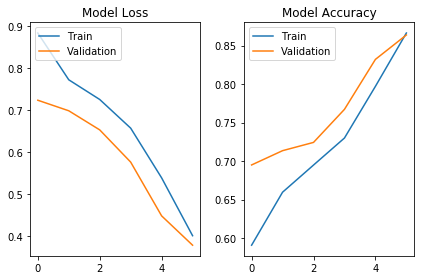

2560/2560 [==============================] - 2s 702us/step

Accurancy: 0.868


In [111]:
num_epochs = 6

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/MLP-Token-{:.3f}.h5'.format((scores[1] * 100)))

## MLP - Morph

Train on 8195 samples, validate on 2049 samples
Epoch 1/6
8195/8195 [==============================] - 57s 7ms/step - loss: 0.8336 - acc: 0.6349 - val_loss: 0.7146 - val_acc: 0.6940
Epoch 2/6
8195/8195 [==============================] - 56s 7ms/step - loss: 0.7561 - acc: 0.6727 - val_loss: 0.6825 - val_acc: 0.7101
Epoch 3/6
8195/8195 [==============================] - 56s 7ms/step - loss: 0.7124 - acc: 0.6981 - val_loss: 0.6535 - val_acc: 0.7194
Epoch 4/6
8195/8195 [==============================] - 56s 7ms/step - loss: 0.6369 - acc: 0.7389 - val_loss: 0.5678 - val_acc: 0.7579
Epoch 5/6
8195/8195 [==============================] - 55s 7ms/step - loss: 0.5140 - acc: 0.8088 - val_loss: 0.4434 - val_acc: 0.8253
Epoch 6/6
8195/8195 [==============================] - 56s 7ms/step - loss: 0.3832 - acc: 0.8663 - val_loss: 0.3724 - val_acc: 0.8580


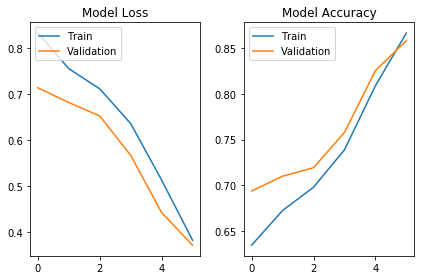

2560/2560 [==============================] - 2s 717us/step

Accurancy: 0.864


In [112]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
model.save('word_saved_models/MLP-Morph-{:.3f}.h5'.format((scores[1] * 100)))